# Project 1: Integration of Mergesort & Insertion Sort
In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer S as a threshold for the size of subarrays. Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

# (a) Algorithm implementation: 
Implement the above hybrid algorithm.
# (b) Generate input data: 
Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.

In [2]:
import random
import time
import numpy as np

keyComparison = 0

def main():
    global keyComparison
    while True:
        size = int(input("Enter size of elements:"))
        max_value = int(input("Enter largest number(x):"))
        ptr = generate_arr(size, max_value)
        
        choice = int(input("1: Insertion Sort\n2: Merge Sort\n3: Hybrid Sort\nPlease enter choice:"))
        while choice != 4:
            if choice == 3:
                threshold = int(input("Enter threshold:"))

            temp_ptr = ptr.copy()
            keyComparison = 0 
            start_time = time.time()
            if choice == 1:
                print("\ninsertionSort()")
                insertion_sort(temp_ptr, 0, size)
            elif choice == 2:
                print("\nmergeSort()")
                merge_sort(temp_ptr, 0, size - 1)
            elif choice == 3:
                print("\nhybridSort()")
                hybrid_sort(temp_ptr, threshold, 0, size - 1)

            elapsed_time = time.time() - start_time
            print(f"Array Size: {size}, Largest Number: {max_value}", end="")
            if choice == 3:
                print(f", Threshold: {threshold}", end="")
            print("\n")
            print(f"Number of key comparison: {keyComparison}\nTime Elapsed: {elapsed_time:.6f} seconds\n\n\n")
            choice = int(input("1: Insertion Sort\n2: Merge Sort\n3: Hybrid Sort\n4: Reset Array\n5: Exit\nPlease enter choice:"))
            del temp_ptr
            if choice == 5:
                break
        del ptr
        if choice == 5:
            break

def hybrid_sort(ptr, threshold, s, e):
    if e - s <= 0:
        return
    elif e - s <= threshold:
        insertion_sort(ptr, s, e + 1)
    else:
        mid = (s + e) // 2
        hybrid_sort(ptr, threshold, s, mid)
        hybrid_sort(ptr, threshold, mid + 1, e)
        merge(ptr, s, e)

def merge_sort(ptr, s, e):
    if e - s <= 0:
        return
    mid = (s + e) // 2
    merge_sort(ptr, s, mid)
    merge_sort(ptr, mid + 1, e)
    merge(ptr, s, e)

def merge(ptr, s, e):
    if e - s <= 0:
        return
    mid = (s + e) // 2
    a, b = s, mid + 1
    while a <= mid and b <= e:
        cmp = compare(ptr[a], ptr[b])
        if cmp > 0:  # ptr[a] > ptr[b]
            tmp = ptr[b]
            for i in range(mid + 1, a, -1):
                ptr[i] = ptr[i - 1]
            ptr[a] = tmp
            a += 1
            mid += 1
            b += 1
        elif cmp < 0:  # ptr[a] < ptr[b]
            a += 1
        else:  # ptr[a] == ptr[b]
            if a == mid and b == e:
                break
            tmp = ptr[b]
            a += 1
            for i in range(mid + 1, a, -1):
                ptr[i] = ptr[i - 1]
            ptr[a] = tmp
            a += 1
            mid += 1
            b += 1

def insertion_sort(ptr, s, e):
    for i in range(s + 1, e):
        for j in range(i, s, -1):
            if compare(ptr[j], ptr[j - 1]) < 0:
                swap(ptr, j, j - 1)
            else:
                break

def swap(arr, index1, index2):
    temp = arr[index1]
    arr[index1] = arr[index2]
    arr[index2] = temp

def compare(value1, value2):
    global keyComparison 
    keyComparison += 1
    if value1 > value2:
        return 1
    elif value1 < value2:
        return -1
    else:
        return 0

def generate_arr(size, max_value):
    arr = [0] * size
    # print("Memory successfully allocated.")
    random.seed()
    for i in range(size):
        arr[i] = random.randint(0, max_value)
    return arr

def print_arr(arr):
    print("The elements of the array are:")
    print(", ".join(map(str, arr)))
    print("\n")

In [30]:
main()

Enter size of elements:1000
Enter largest number(x):1000
1: Insertion Sort
2: Merge Sort
3: Hybrid Sort
Please enter choice:1

insertionSort()
Array Size: 1000, Largest Number: 1000

Number of key comparison: 251824
Time Elapsed: 0.119927 seconds



1: Insertion Sort
2: Merge Sort
3: Hybrid Sort
4: Reset Array
5: Exit
Please enter choice:2

mergeSort()
Array Size: 1000, Largest Number: 1000

Number of key comparison: 8333
Time Elapsed: 0.027416 seconds



1: Insertion Sort
2: Merge Sort
3: Hybrid Sort
4: Reset Array
5: Exit
Please enter choice:3
Enter threshold:0

hybridSort()
Array Size: 1000, Largest Number: 1000, Threshold: 0

Number of key comparison: 8333
Time Elapsed: 0.029254 seconds



1: Insertion Sort
2: Merge Sort
3: Hybrid Sort
4: Reset Array
5: Exit
Please enter choice:3
Enter threshold:1000

hybridSort()
Array Size: 1000, Largest Number: 1000, Threshold: 1000

Number of key comparison: 251824
Time Elapsed: 0.116326 seconds



1: Insertion Sort
2: Merge Sort
3: Hybrid Sort

# (c) Analyze time complexity: 
Run your program of the hybrid algorithm on the datasets generated in Step (b). Record the number of key comparisons performed in each case

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# (c)(i)
With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.

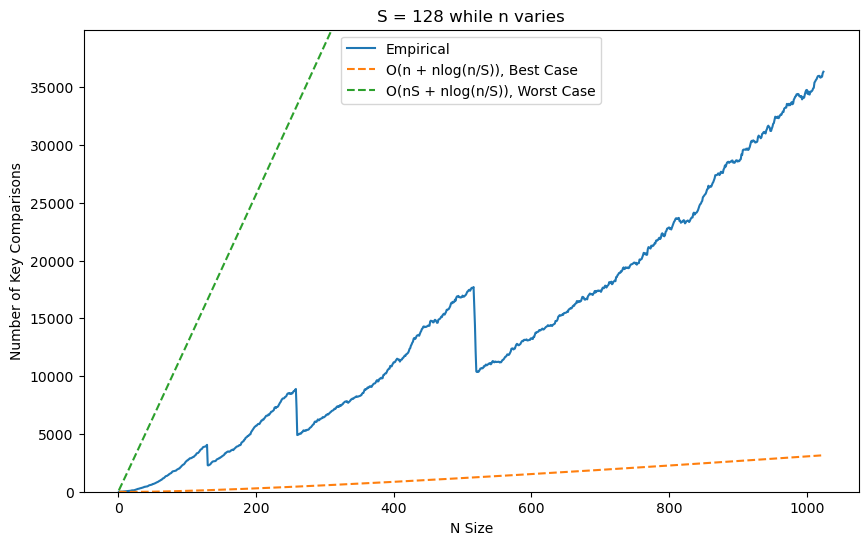

In [33]:
S = 2**7
nArr = np.arange(1, 2**10+1, 1)
keyComparisonsArr = {}
ptr = generate_arr(nArr.max(), nArr.max())
i = 0

for n in nArr:
    tempPtr = ptr.copy()
    keyComparison = 0
    hybrid_sort(tempPtr, S, 0, n-1)
    keyComparisonsArr[i] = keyComparison
    i += 1
    del tempPtr

del ptr

plt.figure(figsize=(10,6))
plt.plot(nArr, keyComparisonsArr.values(), label = "Empirical")
plt.plot(nArr, nArr+nArr*np.log(nArr/S), label = "O(n + nlog(n/S)), Best Case", linestyle = "--")
plt.plot(nArr, nArr*S+nArr*np.log(nArr/S), label = "O(nS + nlog(n/S)), Worst Case", linestyle = "--")
plt.xlabel("N Size")
plt.ylabel("Number of Key Comparisons")
plt.title("S = {} while n varies".format(S))
plt.ylim(0, 1.1*max(keyComparisonsArr.values()))
plt.legend()
plt.show()

# (c)(ii)
With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity

C:\Users\Boiyo\AppData\Local\Temp\ipykernel_4624\629872459.py:23: RuntimeWarning: divide by zero encountered in divide
  plt.plot(SArr, n+n*np.log(n/SArr), label = "O(n + nlog(n/S)), Best Case", linestyle = "--")
C:\Users\Boiyo\AppData\Local\Temp\ipykernel_4624\629872459.py:24: RuntimeWarning: divide by zero encountered in divide
  plt.plot(SArr, n*SArr+n*np.log(n/SArr), label = "O(nS + nlog(n/S)), Worst Case", linestyle = "--")


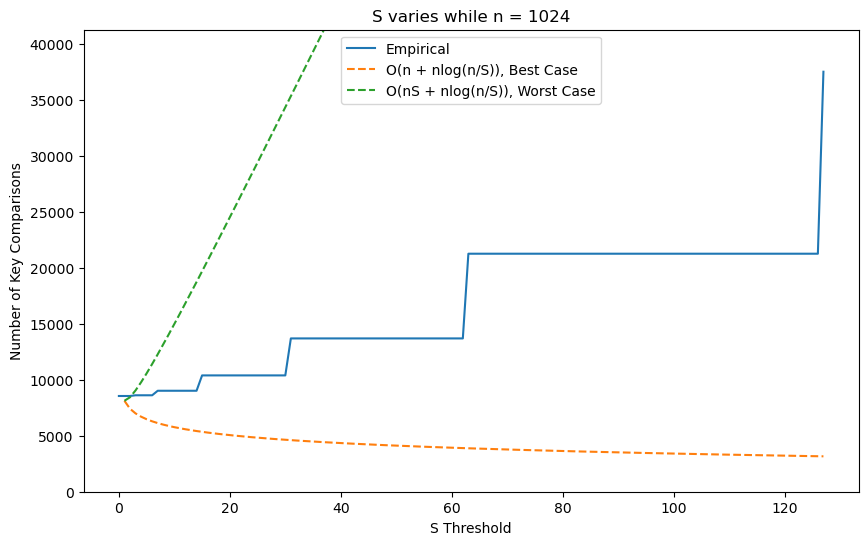

Lowest Key Comparisons = 8549, when S = 2


In [34]:
n = 2**10
SArr = np.arange(0, 2**7, 1)
keyComparisonsArr = {}
ptr = generate_arr(n, n)
i = 0

for S in SArr:
    tempPtr = ptr.copy()
    keyComparison = 0
    hybrid_sort(tempPtr, S, 0, n-1)
    keyComparisonsArr[i] = keyComparison
    i += 1
    del tempPtr

del ptr

for key, value in keyComparisonsArr.items():
    if value == min(keyComparisonsArr.values()):
        bestkey = key
        
plt.figure(figsize=(10,6))
plt.plot(SArr, keyComparisonsArr.values(), label = "Empirical")
plt.plot(SArr, n+n*np.log(n/SArr), label = "O(n + nlog(n/S)), Best Case", linestyle = "--")
plt.plot(SArr, n*SArr+n*np.log(n/SArr), label = "O(nS + nlog(n/S)), Worst Case", linestyle = "--")
plt.xlabel("S Threshold")
plt.ylabel("Number of Key Comparisons")
plt.title("S varies while n = {}".format(n))
plt.ylim(0, 1.1*max(keyComparisonsArr.values()))
plt.legend()
plt.show()
print("Lowest Key Comparisons = {}, when S = {}".format(keyComparisonsArr[bestkey], SArr[bestkey]))

# (c)(iii)
Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

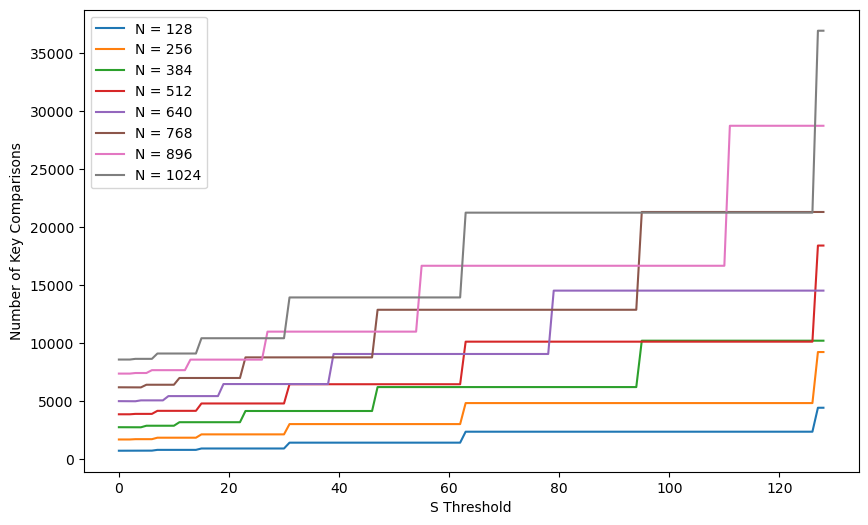

In [6]:
nArr = np.arange(2**7, 2**10+1, 2**7)
SArr = np.arange(0, 2**7+1, 1)
bestS = {}
ptr = generate_arr(nArr.max(), nArr.max())
k = 0

plt.figure(figsize=(10,6))
for n in nArr:
    keyComparisonsArr = {}
    i = 0
    for S in SArr:
        tempPtr = ptr.copy()
        keyComparison = 0
        hybrid_sort(tempPtr, S, 0, n-1)
        keyComparisonsArr[i] = keyComparison
        i += 1
        del tempPtr
    for key, value in keyComparisonsArr.items():
        if value == min(keyComparisonsArr.values()):
            bestS[k] = SArr[key]
    k += 1
    plt.plot(SArr, keyComparisonsArr.values(), label = "N = {}".format(n))
del ptr

plt.xlabel("S Threshold")
plt.ylabel("Number of Key Comparisons")
plt.legend()
plt.show()

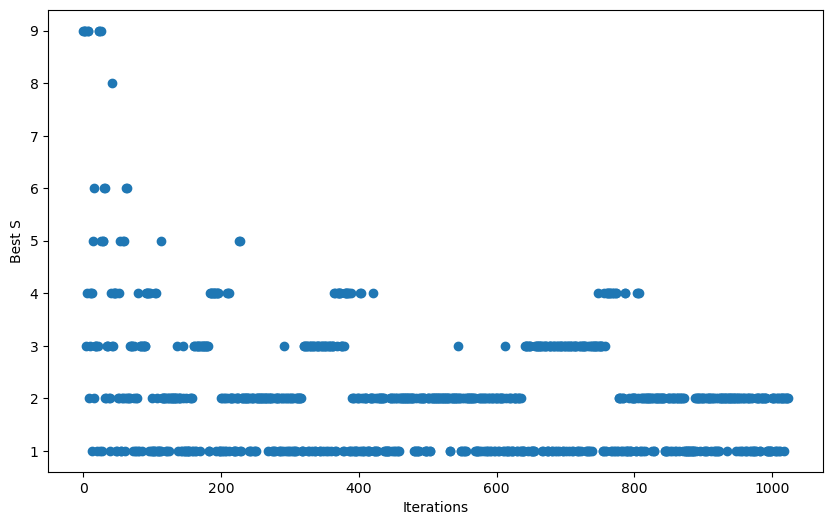

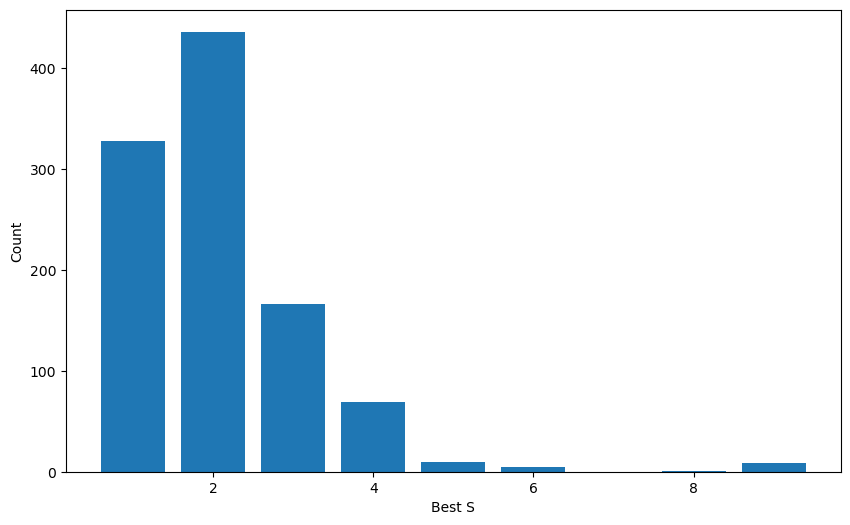

In [24]:
nArr = np.arange(1, 2**10+1, 1)
SArr = np.arange(0, 10, 1)
bestS = {}
ptr = generate_arr(nArr.max(), nArr.max())
k = 0

for n in nArr:
    keyComparisonsArr = {}
    i = 0
    for S in SArr:
        tempPtr = ptr.copy()
        keyComparison = 0
        hybrid_sort(tempPtr, S, 0, n-1)
        keyComparisonsArr[i] = keyComparison
        i += 1
        del tempPtr
    for key, value in keyComparisonsArr.items():
        if value == min(keyComparisonsArr.values()):
            bestS[k] = SArr[key]
    k += 1
del ptr

plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, len(bestS), 1),bestS.values())
plt.xlabel("Iterations")
plt.ylabel("Best S")
plt.show()

duplicate = {}
for value in bestS.values():
    if value in duplicate.keys():
        duplicate[value] += 1
    else:
        duplicate[value] = 1

plt.figure(figsize=(10,6))
plt.bar(duplicate.keys(), duplicate.values())
plt.xlabel("Best S")
plt.ylabel("Count")
plt.show()

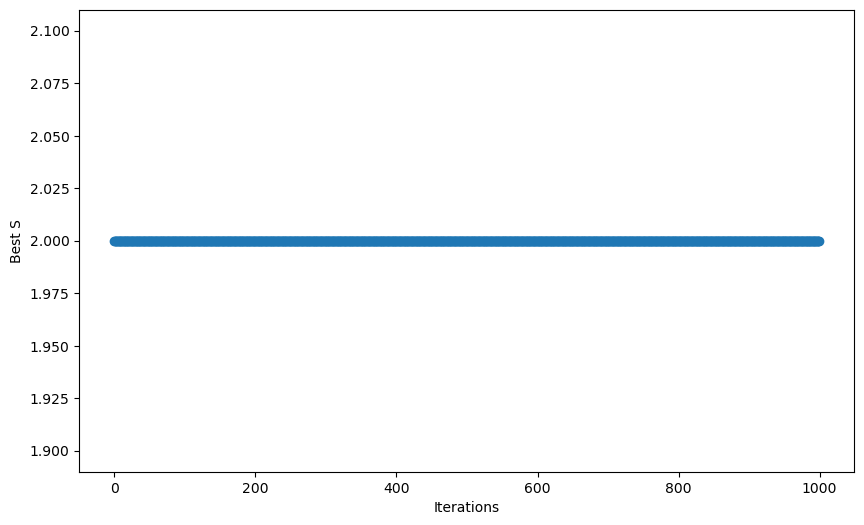

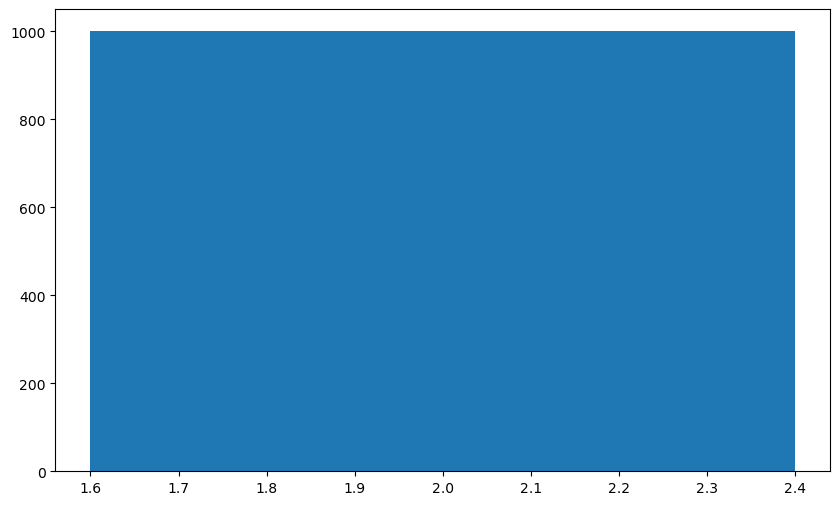

In [37]:
n =  2**10
SArr = np.arange(0, 10, 1)
bestS = {}
k = 0

for x in range(1000):
    ptr = generate_arr(nArr.max(), nArr.max())
    keyComparisonsArr = {}
    i = 0
    for S in SArr:
        tempPtr = ptr.copy()
        keyComparison = 0
        hybrid_sort(tempPtr, S, 0, n-1)
        keyComparisonsArr[i] = keyComparison
        i += 1
        del tempPtr
    for key, value in keyComparisonsArr.items():
        if value == min(keyComparisonsArr.values()):
            bestS[k] = SArr[key]
    k += 1
    del ptr

plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, len(bestS), 1),bestS.values())
plt.xlabel("Iterations")
plt.ylabel("Best S")
plt.show()

duplicate = {}
for value in bestS.values():
    if value in duplicate.keys():
        duplicate[value] += 1
    else:
        duplicate[value] = 1

plt.figure(figsize=(10,6))
plt.bar(duplicate.keys(), duplicate.values())
plt.xlabel("Best S")
plt.ylabel("Count")
plt.show()

# (d) Compare with original Mergesort: 
Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.